# Librairies

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [39]:
data= pd.read_csv("Data_marketing_campaign.csv", sep ="\t")

In [40]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [41]:
rows, columns = data.shape
print(f"La base de données contient {rows} lignes et {columns} colonnes.")

La base de données contient 2240 lignes et 29 colonnes.


In [42]:
missing_vars = data.isna().sum()
print(f"Les variables avec des valeurs manquantes sont :\n{missing_vars[missing_vars > 0]}")

Les variables avec des valeurs manquantes sont :
Income    24
dtype: int64


In [43]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [56]:
df = data.copy()

In [57]:
df['Parents'] = np.where((data['Income'] >= 1) & (data['Teenhome'] >= 1), 1, 0)

In [118]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype 
--------------  ----- 
2240 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


In [120]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [122]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [59]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### Recodage des variables YOLO, Alone, Absurd et Widow en single. 

In [60]:
df['Marital_Status']= df['Marital_Status'].replace({'YOLO','Alone','Absurd','Widow'},'Single')

In [63]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced'], dtype=object)

In [94]:
### Création de la variable age

df['age']=2022-df.Year_Birth

In [124]:
## Nombre d'année d'anciété

df['Nb_Years_anciety'] = 2022 - df['Dt_Customer'].dt.year

In [126]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Parents,age,Nb_Years_anciety
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,65,10
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,1,68,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,57,9
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,0,38,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,0,41,8


C:\Users\ohin1\AppData\Local\Temp\ipykernel_28068\2221348619.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


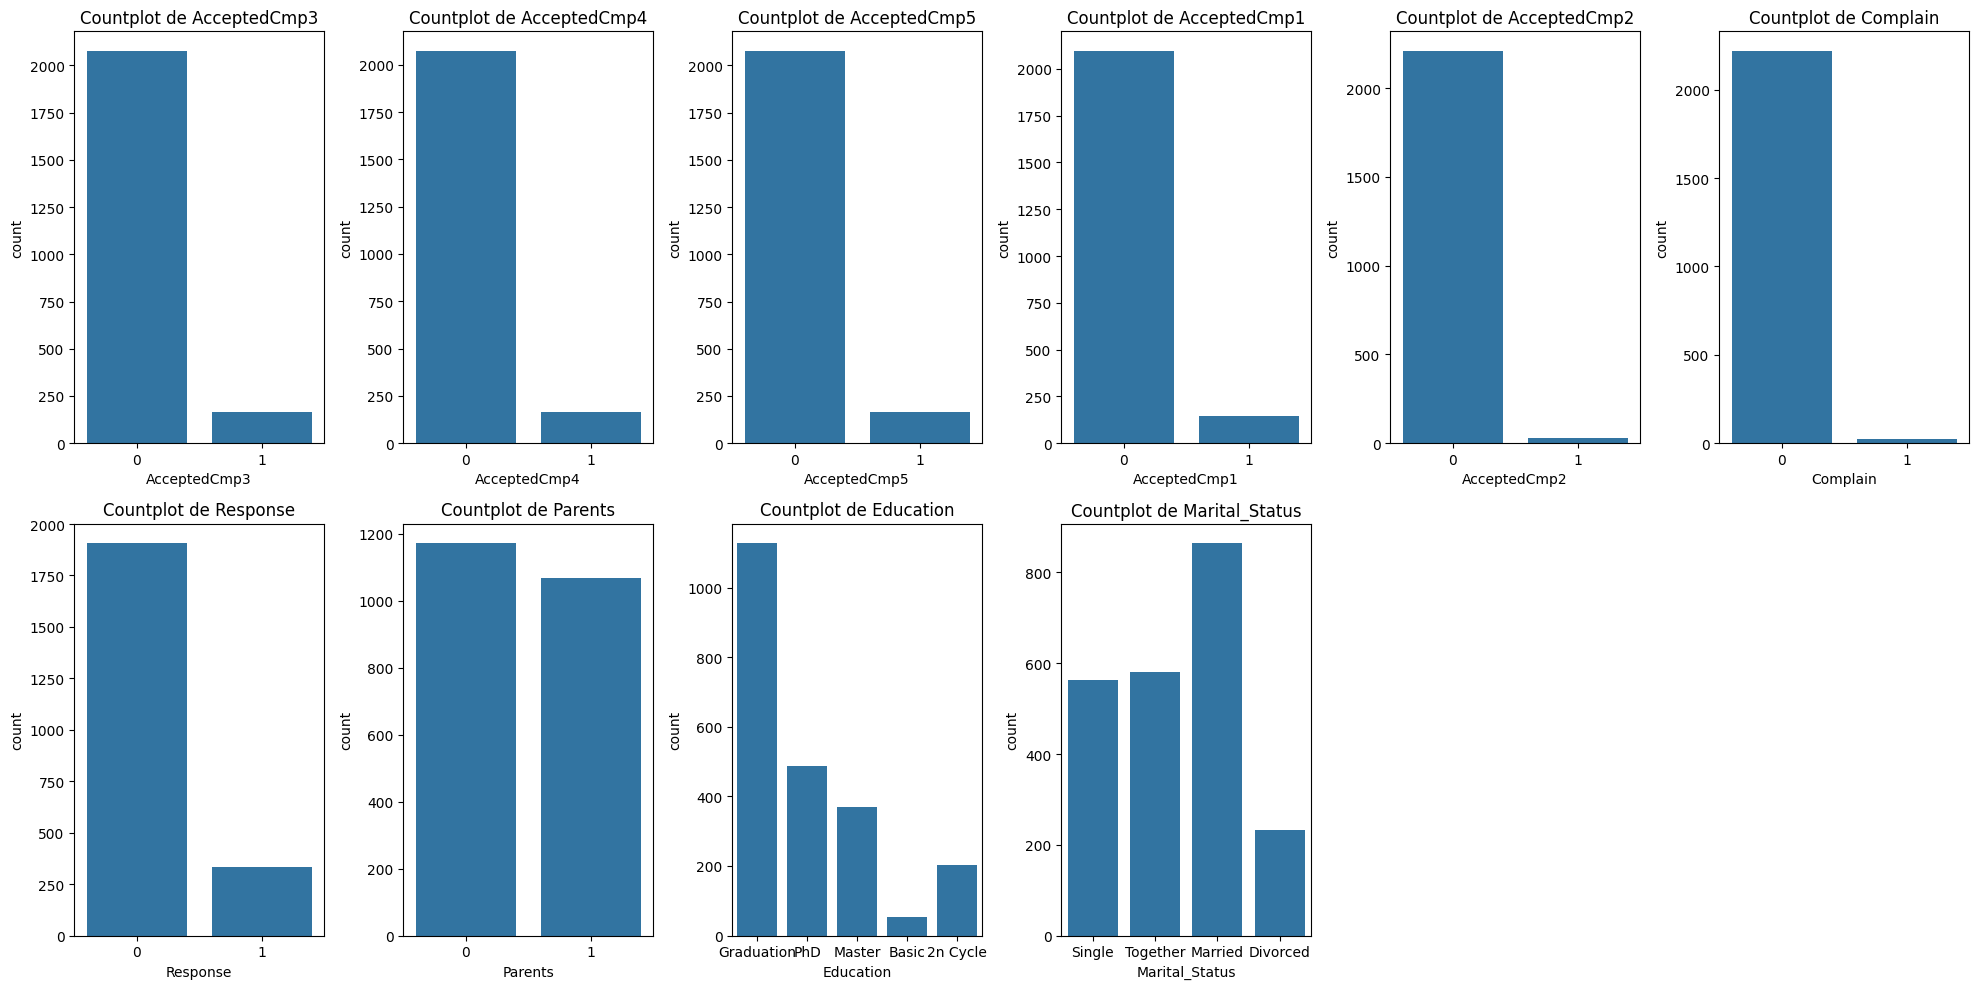

In [114]:
num_vars = len(variables)
ncols=6
nrows = (num_vars + ncols-1)// ncols 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), constrained_layout=True) 
axes = axes.flatten()
variables = ["AcceptedCmp3","AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2",	"Complain","Response",	"Parents","Education","Marital_Status"]
for i, var in enumerate (variables):
    sns.countplot(x = var, data = df, ax= axes[i])
    axes[i].set_title(f'Countplot de {var}')
    plt.tight_layout() 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### Analyse graphique

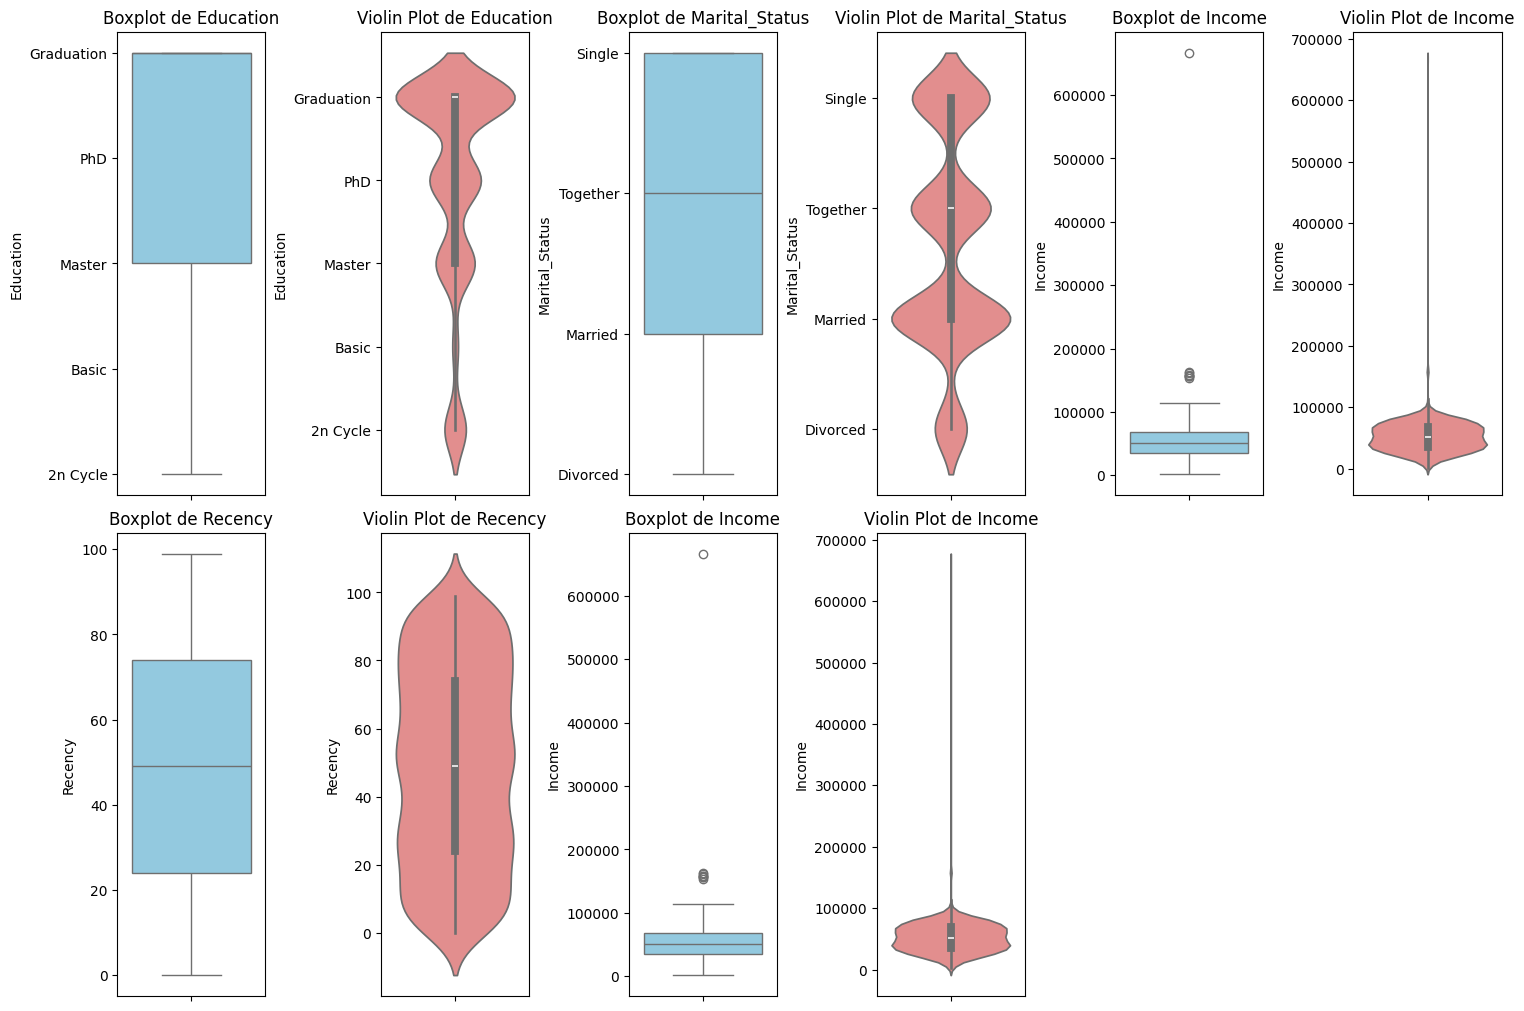

In [145]:
num_vars = len(variables) * 2
n_cols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)
nrows = (num_vars + ncols-1)// ncols 
axes = axes.flatten()
variables =  ["Education","Marital_Status","Income",'Recency',"Income"]
for i, var in enumerate(variables):
    sns.boxplot(y=var, data=df, ax=axes[2*i], color='skyblue')  
    axes[2*i].set_title(f'Boxplot de {var}', fontsize=12)
    sns.violinplot(y=var, data=df, ax=axes[2*i + 1], color='lightcoral')  
    axes[2*i + 1].set_title(f'Violin Plot de {var}', fontsize=12)

for j in range(2*i + 2, len(axes)):
    fig.delaxes(axes[j])

plt.show()
   